## Final Task:
This is your final evaluation for the project. As decided, we will be predicting images of people into three classes: `without_mask`, `mask_weared_incorrect` and `with_mask`. 

In [1]:
import tensorflow as tf

### Loading the dataset
Make a copy of the dataset given to you in your Google Drive (keep it outside, don't put it in any folder to avoid inconvenience). Ensure it is named as `Mask_Dataset` or change the path (the variable `data_dir`) accordingly.

In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pathlib

path='/content/drive/MyDrive/Mask_Dataset-20220703T104318Z-001/Mask_Dataset'
data_dir = pathlib.Path(path)

### Know the Dataset
Most of the code is written for you as you aren't used to these libraries. You are to go through the documentation for your benefit.

In [4]:
# Print image count
image_count = len(list(data_dir.glob('*/*.png')))
print(image_count)

8982


In [5]:
# Print Output Labels
import os
output_classes = os.listdir(data_dir)
print(output_classes)

['with_mask', 'mask_weared_incorrect', 'without_mask']


[2994, 2994, 2994]


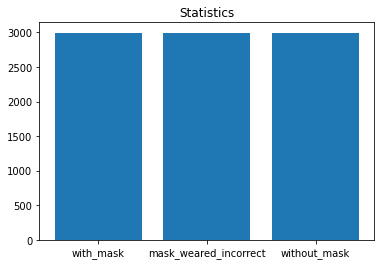

In [25]:
# Plot count of each ouput label
import matplotlib.pyplot as plt

count=[]
for label in output_classes:
  this_path=path+'/'+label
  dir=pathlib.Path(this_path)
  im_count=os.listdir(dir)
  count.append(len(im_count))

print(count)

plt.bar(output_classes,count)
plt.title("Statistics")
plt.show()

In [ ]:
# Check some sample images (Use of cv2)
import cv2
from google.colab.patches import cv2_imshow

# Your code 'with_mask', 'mask_weared_incorrect', 'without_mask'
for label in output_classes:
  print(label)
  this_path=path+'/'+label
  dir=pathlib.Path(this_path)
  im_count=os.listdir(dir)
  for i in range(10):
    img = this_path + '/' + im_count[i]
    img = cv2.imread(img)
    cv2_imshow(img)

In [32]:
# Check shape of the images in your dataset. This will be helpful while specifying input_shape in your Transfer Learning Model
for label in output_classes:
  print(label)
  this_path=path+'/'+label
  dir=pathlib.Path(this_path)
  im_count=os.listdir(dir)
  for i in range(10):
    img = this_path + '/' + im_count[i]
    img = cv2.imread(img)
    print(img.shape)

with_mask
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
mask_weared_incorrect
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
without_mask
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)


In [33]:
# Check if all the images have same shape, else you need to resize them to some common size
# The code provided as it is above in the template will help 
image_shape=(128,128,3)
for label in output_classes:
  print(label)
  this_path=path+'/'+label
  dir=pathlib.Path(this_path)
  im_count=os.listdir(dir)
  for i in range(2994):
    img = this_path + '/' + im_count[i]
    img = cv2.imread(img)
    if img.shape!=(128,128,3):
      print("All images does not have same shape")

with_mask
mask_weared_incorrect
without_mask


In [ ]:
# If the shape is variable, reshape to a common size 
# If it is same, prove it
################ As in above cell it does not print the statement "All images does not have same shape" means all having same shape

In [ ]:
# Anything else you want to plot/experiment


### Model Definition
Choose a model for Transfer Learning (You may also experment with multiple models and keep all of them in this notebook)

In [6]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Dropout,MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential

In [7]:
# Choose and define base model
IMG_HEIGHT = 128
IMG_WIDTH = 128
base_model = tf.keras.applications.inception_v3.InceptionV3(input_shape=(IMG_HEIGHT,IMG_WIDTH, 3),
                                                  include_top=False,
                                                  weights="imagenet")

87924736/87910968 [==============================] - 1s 0us/step


In [9]:
# Print base model summary and have a look at the layers
base_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 63, 63, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 63, 63, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                       

In [10]:
# As we're using Transfer Learning, you do not need to train all the layers. Freeze all of the layers or train some layers (experiment)
count=0
for layer in base_model.layers[:]:
    count=count+1
    layer.trainable = False
print(count)
base_model.summary()    

311
Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 63, 63, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 63, 63, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                   

In [11]:
# Append Fully connected/custom Conv2D/Dropout/MaxPooling layers to the base model
model=Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
#model.add(Dropout(0.02))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
#model.add(MaxPooling2D())

In [12]:
# Add the final output layer
model.add(Dense(3, activation='softmax'))


In [13]:
# Print your model's summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 2, 2, 2048)        21802784  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 512)               4194816   
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 3)                 387       
                                                                 
Total params: 26,162,211
Trainable params: 4,359,427
Non

In [14]:
# Compile you model (set the parameters like loss/optimizers/metrics)
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(0.01),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### Data Augmentation and Pre-processing
Augment the data. You may also try dyanamic augmentation using [`tf.keras.preprocessing.image.ImageDataGenerator `](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator).   
You may use [`tf.keras.applications.vgg16.preprocess_input`](https://www.tensorflow.org/api_docs/python/tf/keras/applications/vgg16/preprocess_input)(or some other base model's utility) for pre-processing (can also be passed as a parameter to `ImageDataGenerator`)

In [20]:
from keras.applications.inception_v3 import preprocess_input # Change according to your base model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Your code 
preprocess_fun = tf.keras.applications.mobilenet.preprocess_input

datagen = ImageDataGenerator(horizontal_flip=True,
                                width_shift_range=0.1,
                                height_shift_range=0.05,
                                rescale = 1./255,
                                validation_split=0.2,                          
                                preprocessing_function=preprocess_fun
                                  )


In [ ]:
# Anything else you wish to try

### Training and Validation Dataset  
Split the dataset into training and validation (We'll be looking for your validation accuracy, assume we are using complete dataset for now). 

Hint: `flow_from_directory` used with `ImageDataGenerator` will simplify things for you.

In [21]:
# Your code
train_generator = datagen.flow_from_directory(
    directory=path,
    target_size=(128,128),
    subset="training",
    class_mode='categorical',
    batch_size=64)
validation_generator = datagen.flow_from_directory(
    directory=path,
    target_size=(128,128),
    subset="validation",
    class_mode='categorical',
    batch_size=64)

Found 7188 images belonging to 3 classes.
Found 1794 images belonging to 3 classes.


### Training  
Train your model for some epochs and plot the graph. Try and save your best model. Experiment with the parameters of `model.fit`

In [23]:
from keras.callbacks import ModelCheckpoint
Model_checkpoint = ModelCheckpoint('best_model_inceptionv3.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
history = model.fit(train_generator,
                    validation_data=validation_generator,
                    epochs=15,
                    batch_size=64,
                    callbacks=[Model_checkpoint])
# ModelCheckpoint is helpful to save the model giving best results (brownie points)

Epoch 1/15
113/113 [==============================] - ETA: 0s - loss: 0.6955 - accuracy: 0.6934
Epoch 1: val_accuracy improved from -inf to 0.75808, saving model to best_model_inceptionv3.h5
113/113 [==============================] - 1464s 13s/step - loss: 0.6955 - accuracy: 0.6934 - val_loss: 0.5801 - val_accuracy: 0.7581
Epoch 2/15
113/113 [==============================] - ETA: 0s - loss: 0.5629 - accuracy: 0.7696
Epoch 2: val_accuracy improved from 0.75808 to 0.82999, saving model to best_model_inceptionv3.h5
113/113 [==============================] - 52s 465ms/step - loss: 0.5629 - accuracy: 0.7696 - val_loss: 0.4592 - val_accuracy: 0.8300
Epoch 3/15
113/113 [==============================] - ETA: 0s - loss: 0.4910 - accuracy: 0.8059
Epoch 3: val_accuracy did not improve from 0.82999
113/113 [==============================] - 53s 469ms/step - loss: 0.4910 - accuracy: 0.8059 - val_loss: 0.5801 - val_accuracy: 0.7246
Epoch 4/15
113/113 [==============================] - ETA: 0s - lo

### Evaluate the performance

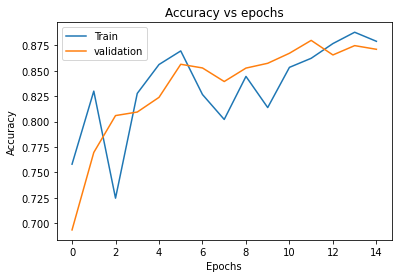

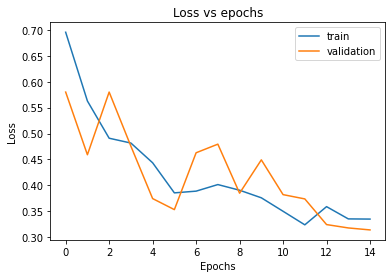

In [27]:
# Plot training & validation loss/accuracy values
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])
plt.title('Accuracy vs epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'validation'])
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs epochs')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()


In [34]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# print classification report

validation_classes = []
validation_images = []
for i in range( -(-validation_generator.samples // validation_generator.batch_size)):
        batch = validation_generator.next()
        expected = np.argmax(batch[1], axis=1)
        validation_classes.extend(expected)
        validation_images.extend(batch[0])
validation_classes = np.array(validation_classes)
#print(validation_classes)
validation_images = np.array(validation_images)
Y_pred = model.predict(validation_images)
y_pred = np.argmax(Y_pred, axis=1)
print(classification_report(validation_classes, y_pred,target_names = ['without_mask', 'mask_weared_incorrect', 'with_mask']))

                       precision    recall  f1-score   support

         without_mask       0.84      0.96      0.89       598
mask_weared_incorrect       0.85      0.84      0.84       598
            with_mask       0.96      0.82      0.89       598

             accuracy                           0.88      1794
            macro avg       0.88      0.88      0.87      1794
         weighted avg       0.88      0.88      0.87      1794



In [51]:
# Use the classification report to print precision, recall, f1-score for the three classes(optional, brownie points)